In [1]:
%matplotlib inline
from pylab import *
from sci378 import *

Version:  0.0.30


$$
d=\frac{v \cos \theta}{g}\left(v \sin \theta+\sqrt{v^2 \sin ^2 \theta+2 g y_0}\right)
$$

$$
d=\frac{v^2}{g} \sin 2 \theta
$$

In [2]:
def dfun_dx(x,step=0.01):
    y_left=fun(x-step/2)
    y_right=fun(x+step/2)
    

    m=(y_right-y_left)/(step) # rise over run
    
    return m

In [3]:
def fun(θ):
    v=1
    g=10
    
    return v**2/g*sin(2*θ)

In [4]:
def fun(θ):
    v=1
    g=10
    yo=3
    
    return v*cos(θ)/g*(v*sin(θ)+sqrt(v**2*sin(θ)**2+2*g*yo))

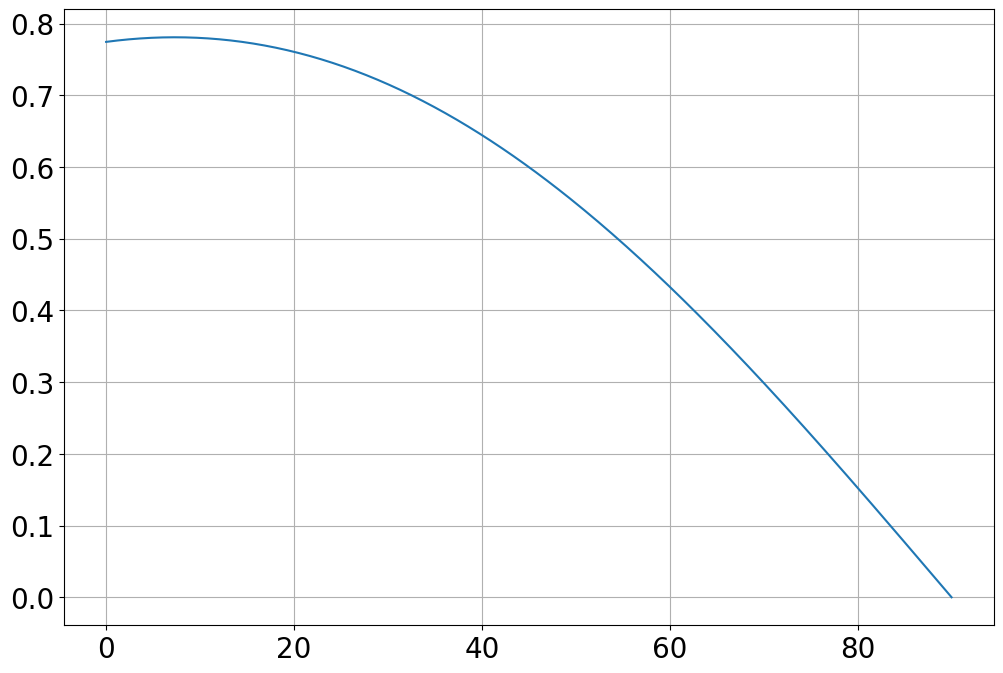

In [5]:
θ=linspace(0,90,300)
d=fun(radians(θ))
plot(θ,d)

In [6]:
x_start=0
x_end=90
step=0.01

S=Storage()

x=x_start
number_of_steps=0
while x<=x_end:
    
    # print(x," ",end="")
    
    y_left=dfun_dx(radians(x)-step/2)
    y_right=dfun_dx(radians(x)+step/2)
    
    if sign(y_left)!=sign(y_right):
        S+=x,y_left, y_right  # saving the result for later
    
    x=x+step
    number_of_steps=number_of_steps+1
    
print("done...",number_of_steps)

x,y_left, y_right=S.arrays()  # give me the saved results as two arrays

x,y_left, y_right

done... 9000


(array([7.01, 7.02, 7.03, 7.04, 7.05, 7.06, 7.07, 7.08, 7.09, 7.1 , 7.11,
        7.12, 7.13, 7.14, 7.15, 7.16, 7.17, 7.18, 7.19, 7.2 , 7.21, 7.22,
        7.23, 7.24, 7.25, 7.26, 7.27, 7.28, 7.29, 7.3 , 7.31, 7.32, 7.33,
        7.34, 7.35, 7.36, 7.37, 7.38, 7.39, 7.4 , 7.41, 7.42, 7.43, 7.44,
        7.45, 7.46, 7.47, 7.48, 7.49, 7.5 , 7.51, 7.52, 7.53, 7.54, 7.55,
        7.56, 7.57, 7.58]),
 array([8.04887836e-03, 7.90859288e-03, 7.76829785e-03, 7.62799330e-03,
        7.48767921e-03, 7.34735560e-03, 7.20702247e-03, 7.06667983e-03,
        6.92632767e-03, 6.78596601e-03, 6.64559484e-03, 6.50521418e-03,
        6.36482403e-03, 6.22442438e-03, 6.08401525e-03, 5.94359665e-03,
        5.80316856e-03, 5.66273101e-03, 5.52228399e-03, 5.38182751e-03,
        5.24136157e-03, 5.10088618e-03, 4.96040134e-03, 4.81990705e-03,
        4.67940333e-03, 4.53889017e-03, 4.39836757e-03, 4.25783556e-03,
        4.11729412e-03, 3.97674326e-03, 3.83618300e-03, 3.69561332e-03,
        3.55503424e-03, 3.

## Secant method

https://en.wikipedia.org/wiki/Secant_method

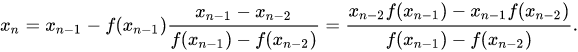

In [7]:
x0=30
x1=60
tol=0.00001
number_of_steps=0

while abs(x1-x0)>tol:
    
    x2=x1-dfun_dx(radians(x1))*(x1-x0)/(dfun_dx(radians(x1))-dfun_dx(radians(x0)))
    
    x0=x1
    x1=x2

    number_of_steps+=1
    
print("done...",number_of_steps)
x1


done... 5


7.296185104798146

## using scipy fmin on the original

In [8]:
from scipy.optimize import fmin

In [9]:
def fun(θ):
    v=1
    g=10
    yo=3
    
    return v*cos(θ)/g*(v*sin(θ)+sqrt(v**2*sin(θ)**2+2*g*yo))

In [10]:
def negfun(θ):
    return -fun(θ)

In [11]:
degrees(fmin(negfun,radians(45)))

Optimization terminated successfully.
         Current function value: -0.781025
         Iterations: 16
         Function evaluations: 32


array([7.29492188])